In [1]:
import os
import numpy as np
import shutil
import matplotlib
import matplotlib.pyplot as plt
from astropy import table
from astropy.io import ascii
import cmasher as cmr
import dynamite as dyn
from plotbin import display_pixels

In [2]:
# Get the DYNAMITE models
fname = 'F2_config11_with_pm.yaml'
c = dyn.config_reader.Configuration(fname,
                                    reset_logging=True,
                                    user_logfile='test_nnls',
                                    reset_existing_output=False)
stars = c.system.get_unique_triaxial_visible_component()
# print(f'stars.kinematic_data[0]:\n{stars.kinematic_data[0]}\n\nstars.kinematic_data[1]:\n{stars.kinematic_data[1]}')
_ = dyn.model_iterator.ModelIterator(config=c)

[INFO] 15:14:31 - dynamite.config_reader.Configuration - Config file F2_config11_with_pm.yaml read.
[INFO] 15:14:31 - dynamite.config_reader.Configuration - io_settings...
[INFO] 15:14:31 - dynamite.config_reader.Configuration - Output directory tree: F2_output11/.
[INFO] 15:14:31 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 15:14:31 - dynamite.config_reader.Configuration - model_components...
[INFO] 15:14:31 - dynamite.physical_system.Component - bh: DYNAMITE will currently ignore the mandatory attribute contributes_to_potential.
[INFO] 15:14:31 - dynamite.config_reader.Configuration - dh... ignored
[INFO] 15:14:31 - dynamite.physical_system.Component - stars: DYNAMITE will currently ignore the mandatory attribute contributes_to_potential.
[INFO] 15:14:31 - dynamite.kinematics.Kinematics - propermotions: vx_sigma=158.3257256428834, dvx=30.975609756097583=0.19564483049309117*vx_sigma, vx_width=1270.0=8.021438050216732*vx_sigma
[INFO] 15:14:31 - dynamite.kinemati

In [3]:
print(len(stars.kinematic_data[0].data['nstarbin']))
print(stars.kinematic_data[0].data['nstarbin'])
print(stars.kinematic_data[0].data['PSF_sigma'], stars.kinematic_data[0].data['PSF_weight'])
stars.kinematic_data[0].PSF

77
[641. 734. 665. 654. 579. 764. 732. 653. 707. 661. 671. 586. 717. 662.
 695. 673. 695. 825. 621. 638. 745. 796. 825. 789. 780. 749. 754. 732.
 743. 716. 752. 796. 810. 725. 731. 722. 809. 731. 652. 603. 643. 636.
 718. 629. 604. 589. 650. 575. 529. 687. 561. 496. 452. 649. 589. 546.
 548. 630. 650. 547. 591. 659. 548. 587. 512. 623. 631. 513. 532. 700.
 563. 540. 635. 601. 651. 770. 481.]
0.8 1.0


{'sigma': [0.8], 'weight': [1.0]}

In [4]:
p = dyn.plotter.Plotter(c)

In [5]:
# Structure of proper motion input data
for i, k in enumerate(stars.kinematic_data):
    if isinstance(k, dyn.kinematics.ProperMotions):
        i_pm = i
        pm_data = k.data
        pm_input = k
        break
print('Shapes of proper motion input data:')
for k in sorted(pm_data):
    print(f"{k}: {pm_data[k].shape}")
print(f"{pm_data['vxrange'] = }, {pm_data['vyrange'] = }")
h2d = pm_input.as_histogram2d()
print(f"{pm_input.hist_width = }, {pm_input.hist_bins = }")
print(f"2d histogram velocity edges  {len(h2d.xedg[0]) = }, vx-min/max: {h2d.xedg[0][0]}, {h2d.xedg[0][-1]}")
print(f"2d histogram vel bin centers {len(h2d.x[0])    = }, vx-min/max: {h2d.x[0][0]}, {h2d.x[0][-1]}")
print(f"2d histogram dvx:                               {h2d.dx[0][0]}")

Shapes of proper motion input data:
PM_2dhist: (77, 41, 41)
PM_2dhist_sigma: (77, 41, 41)
PSF_sigma: ()
PSF_weight: ()
binID_dynamite: (77,)
hist_scale: ()
nstarbin: (77,)
vxrange: ()
vyrange: ()
xbin: (77,)
ybin: (77,)
pm_data['vxrange'] = array(635.), pm_data['vyrange'] = array(465.)
pm_input.hist_width = array([1270.,  930.]), pm_input.hist_bins = array([41, 41])
2d histogram velocity edges  len(h2d.xedg[0]) = 42, vx-min/max: -635.0, 635.0
2d histogram vel bin centers len(h2d.x[0])    = 41, vx-min/max: -619.5121951219512, 619.5121951219512
2d histogram dvx:                               30.975609756097583


In [6]:
# Strange: nstarbin > sum of all PM_2dhist entries almost everywhere
for i in range(0, pm_data['PM_2dhist'].shape[0], 4):  # don't print everything...
    print(f"Spatial bin {i}:\t{pm_data['nstarbin'][i]=},\t{np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=}")
print(f"{np.argmin(pm_data['nstarbin'] - np.sum(pm_data['PM_2dhist'], axis=(1,2))*pm_data['hist_scale']) = }")
print(f"{np.argmax(pm_data['nstarbin'] - np.sum(pm_data['PM_2dhist'], axis=(1,2))*pm_data['hist_scale']) = }")

Spatial bin 0:	pm_data['nstarbin'][i]=641.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=636.0
Spatial bin 4:	pm_data['nstarbin'][i]=579.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=574.0
Spatial bin 8:	pm_data['nstarbin'][i]=707.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=700.0
Spatial bin 12:	pm_data['nstarbin'][i]=717.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=708.0000000000001
Spatial bin 16:	pm_data['nstarbin'][i]=695.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=682.9999999999999
Spatial bin 20:	pm_data['nstarbin'][i]=745.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=738.0
Spatial bin 24:	pm_data['nstarbin'][i]=780.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=767.0000000000001
Spatial bin 28:	pm_data['nstarbin'][i]=743.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=729.0
Spatial bin 32:	pm_data['nstarbin'][i]=810.0,	np.sum(pm_data['PM_2dhist'][i])*pm_data['hist_scale']=793.0000000000001
S

sp_bin_idx=11
sp_bin_idx=48
sp_bin_idx=75


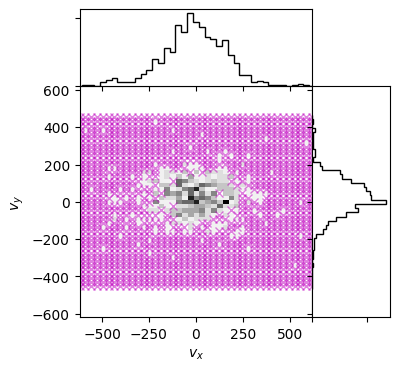

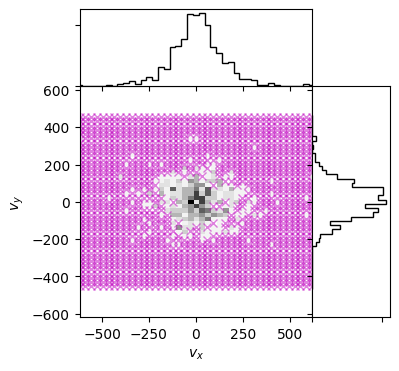

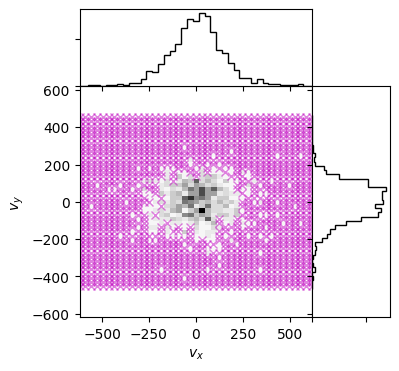

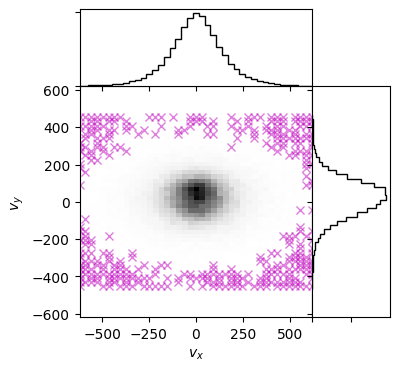

In [7]:
# Plot the input data
h2d = pm_input.as_histogram2d()
# First, a few individual spatial bins...
for sp_bin_idx in(11, 48, 75):
    print(f'{sp_bin_idx=}')
    _ = p.hist2d_plot(h2d, orb_idx=0, sp_bin_idx=sp_bin_idx, show_1d=True, empty_bins=True)
# Now the global 2d histogram...
h2d_global = dyn.kinematics.Histogram2D(xedg=h2d.xedg,
                                        y=np.sum(h2d.y, axis=3)[:,:,:,np.newaxis],
                                        normalise=False)
_ = p.hist2d_plot(h2d_global, orb_idx=0, sp_bin_idx=0, show_1d=True, empty_bins=True)

(-884.1258738014228, 872.1515465511909, -224.82329302325581, 230.1211534883721)

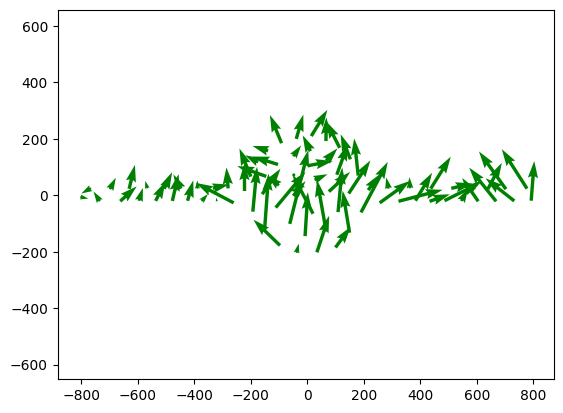

In [8]:
# Experimental, does NOT work yet: quiver plot -> problem in get_mean or plotting...?
v_mean = pm_input.as_histogram2d().get_mean()
x, y = pm_data['xbin'], pm_data['ybin']
u, v = v_mean[0][0], v_mean[1][0]  # first index: vx/vy, second index: orb_idx
plt.quiver(x, y, u, v, color='g')
plt.axis('equal')

In [9]:
# Get best model
best_model_idx = c.all_models.get_best_n_models_idx(n=1)[0]
model = c.all_models.get_model_from_row(best_model_idx)
orblib = model.get_orblib()
print(f'{orblib.parset=}')
_ = model.get_weights(orblib)
orb_weights = model.weights
hist2d_orblib = orblib.vel_histograms[i_pm]
# print(f'{hist2d_orblib.y.shape = }')

[INFO] 15:14:36 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy


orblib.parset=<Row index=5>
       m-bh         a-bh  q-stars p-stars u-stars    ml  
     float64      float64 float64 float64 float64 float64
----------------- ------- ------- ------- ------- -------
4299916.281141509    0.01    0.29    0.98    0.99     1.0


[INFO] 15:14:38 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output F2_output11/models/orblib_001_004/ml01.00/orbit_weights.ecsv.


Ranges are different from input data due to velocity scaling => FIXME: add analogue to rebin_orblib_to_observations() to ProperMotions.transform_orblib_to_observables()
vx_range=[-619.5121951219512, 619.5121951219512], vy_range=[-453.6585365853658, 453.6585365853659]
vx-range from xedg: -635.0, 635.0
vy-range from xedg: -465.0, 465.0


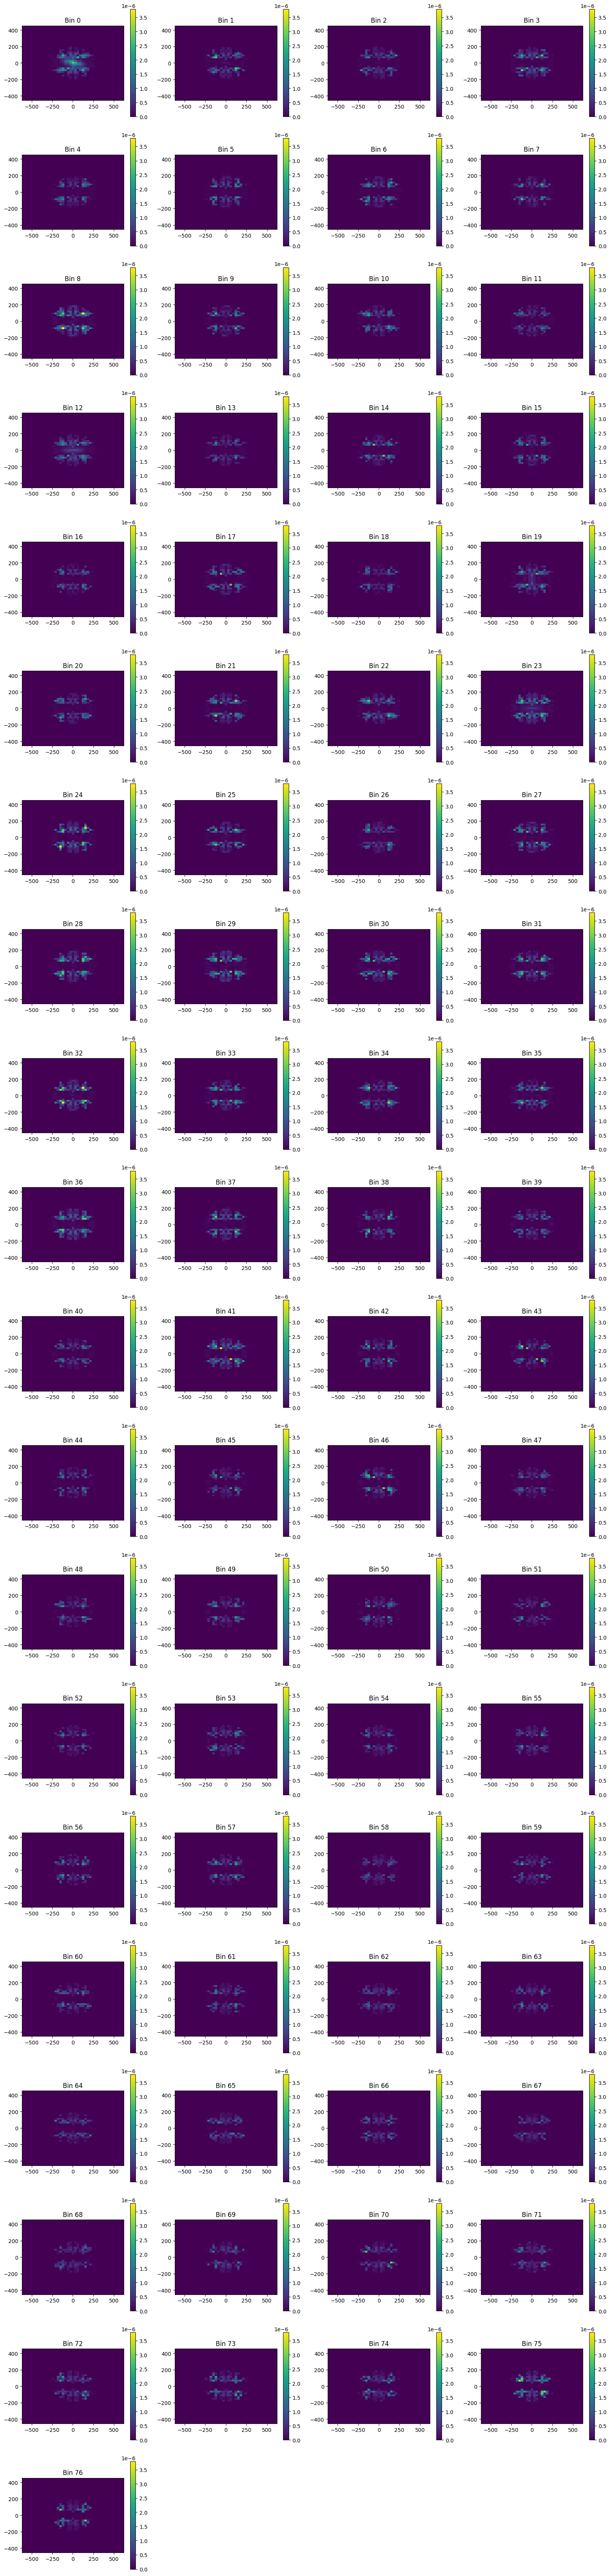

In [10]:
# plot pm histograms for all spatial bins
n_bins = hist2d_orblib.y.shape[-1]

vx_range = [hist2d_orblib.x[0].min(), hist2d_orblib.x[0].max()]
vy_range = [hist2d_orblib.x[1].min(), hist2d_orblib.x[1].max()]
ratio = (vy_range[1]-vy_range[0]) / (vx_range[1]-vx_range[0])
print('Ranges are different from input data due to velocity scaling => FIXME: add analogue to rebin_orblib_to_observations() to ProperMotions.transform_orblib_to_observables()')
print(f'{vx_range=}, {vy_range=}')
print(f"vx-range from xedg: {hist2d_orblib.xedg[0][0]}, {hist2d_orblib.xedg[0][-1]}")
print(f"vy-range from xedg: {hist2d_orblib.xedg[1][0]}, {hist2d_orblib.xedg[1][-1]}")

data = np.einsum('ijkl,i', hist2d_orblib.y, orb_weights)
# data = np.dot(hist2d_orblib.y.T, orb_weights).T  # specific orbit: hist2d.y[orb_idx,:,:,bin_idx]

fig = plt.figure(figsize=(20, 20 * (n_bins // 4 // 4 + 2) * ratio))
for bin_idx in range(0, n_bins, 1):  ##################################
    ax = plt.subplot(n_bins // 4 + (1 if n_bins % 4 > 0 else 0), 4, bin_idx + 1)
    # im = ax.imshow(data, aspect='equal', interpolation='bilinear', #cmap=cm.RdYlGn,
    im = ax.imshow(data[:,:,bin_idx], aspect='equal', interpolation='none', #cmap=cm.RdYlGn,
                   origin='lower', extent=vx_range + vy_range,
                   vmax=data.max(), vmin=0)
    fig.colorbar(im, ax=ax, shrink=1)
    ax.set_title(f'Bin {bin_idx}')
plt.show()

vx_range=[-619.5121951219512, 619.5121951219512], vy_range=[-453.6585365853658, 453.6585365853659]


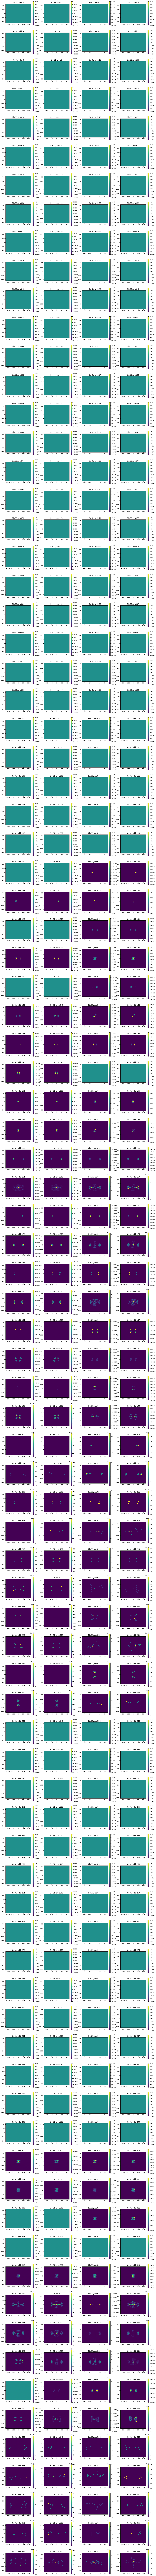

In [11]:
# plot pm histograms for specific bin
n_orbits = hist2d_orblib.y.shape[0]

bin_idx = 31

vx_range = [hist2d_orblib.x[0].min(), hist2d_orblib.x[0].max()]
vy_range = [hist2d_orblib.x[1].min(), hist2d_orblib.x[1].max()]
ratio = (vy_range[1]-vy_range[0]) / (vx_range[1]-vx_range[0])
print(f'{vx_range=}, {vy_range=}')

fig = plt.figure(figsize=(20, 20 * (n_orbits // 4 // 4 + 2) * ratio))
for orb_idx in range(0, n_orbits, 1):  ##################################
    data = hist2d_orblib.y[orb_idx,:,:,bin_idx]
    ax = plt.subplot(n_orbits // 4 + (1 if n_orbits % 4 > 0 else 0), 4, orb_idx + 1)
    im = ax.imshow(data, aspect='equal', interpolation='none', #cmap=cm.RdYlGn,
                   origin='lower', extent=vx_range + vy_range,
                   vmax=data.max(), vmin=0)
    fig.colorbar(im, ax=ax)
    ax.set_title(f'Bin {bin_idx}, orbit {orb_idx}')

plt.show()

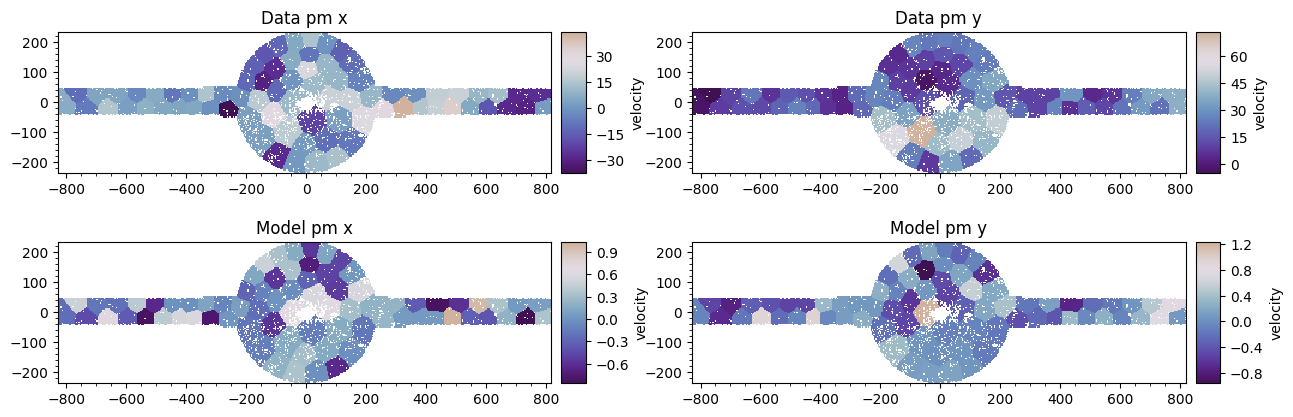

In [12]:
# plot the pm histograms' mean values (doesn't fit at all yet...)
# mostly from plotter.py

def create_plot(dp_args, data):
    # get aperture and bin data
    x = dp_args['x']
    y = dp_args['y']
    dx = dp_args['dx']
    grid = dp_args['idx_bin_to_pix']
    angle_deg = dp_args['angle']
    # Only select the pixels that have a bin associated with them.
    s = np.ravel(np.where((grid >= 0)))

    #fhist, _ = np.histogram(grid[s], bins=len(data))
    #data = data / fhist
    # plot settings
    #data_min = min(data[grid[s]] / max(data))
    #data_max = max(data[grid[s]] / max(data))
    # The galaxy has NOT already rotated with PA to align major axis with x
    map1 = cmr.get_sub_cmap('twilight_shifted', 0.05, 0.6)
    kw_display_pixels1 = dict(pixelsize=dx,
                              angle=angle_deg,
                              colorbar=True,
                              nticks=7,
                              # cmap='sauron')
                              cmap=map1)
    # PLOT THE DATA
    #plt.figure()
    #c_c = data[grid[s]] / max(data)
    c_c = data[grid[s]]
    display_pixels.display_pixels(x, y, c_c,
                                  vmin=min(data[grid[s]]), vmax=max(data[grid[s]]),
                                  label='velocity',
                                  **kw_display_pixels1)
    #plt.gca().set_title(title)
    #plt.show()

fig = plt.figure(figsize=(15, 5))

n_rows, n_cols = 2, 2

mean_vel = pm_input.as_histogram2d().get_mean()  # tuple (mean_velx(n_orbits, n_apertures), mean_vely(n_orbits, n_apertures))

ax = plt.subplot(n_rows, n_cols, 1)
ax.set_title(f'Data pm x')
mean = mean_vel[0][0]
create_plot(pm_input.dp_args, mean)

ax = plt.subplot(n_rows, n_cols, 2)
ax.set_title(f'Data pm y')
mean = mean_vel[1][0]
create_plot(pm_input.dp_args, mean)

data = np.einsum('ijkl,i', hist2d_orblib.y, orb_weights)[np.newaxis]
hist_plot = dyn.kinematics.Histogram2D(xedg=hist2d_orblib.xedg,
                                       y=data,
                                       normalise=False)
mean_vel = hist_plot.get_mean()  # tuple (mean_velx(n_orbits, n_apertures), mean_vely(n_orbits, n_apertures))

ax = plt.subplot(n_rows, n_cols, 3)
ax.set_title(f'Model pm x')
mean = mean_vel[0][0]
create_plot(pm_input.dp_args, mean)

ax = plt.subplot(n_rows, n_cols, 4)
ax.set_title(f'Model pm y')
mean = mean_vel[1][0]
create_plot(pm_input.dp_args, mean)

data.shape = (41, 41, 77)
np.max(hist2d_orblib.y)=0.037625000000000006
sp_bin_idx = 25
sp_bin_idx = 48
sp_bin_idx = 70


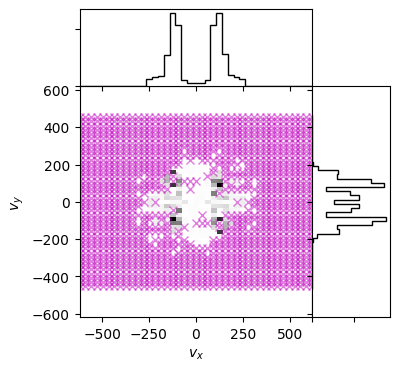

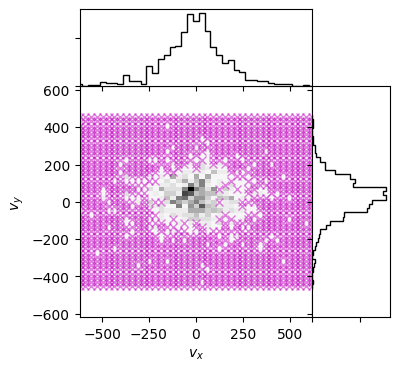

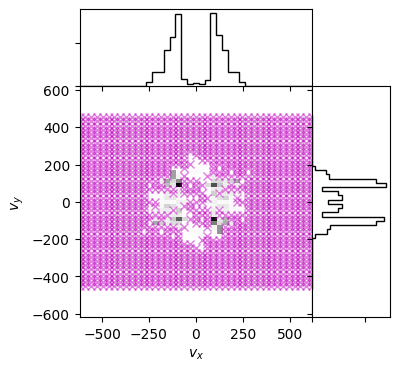

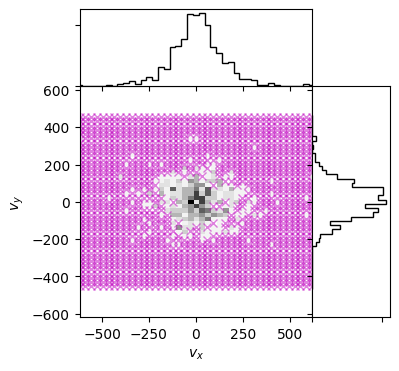

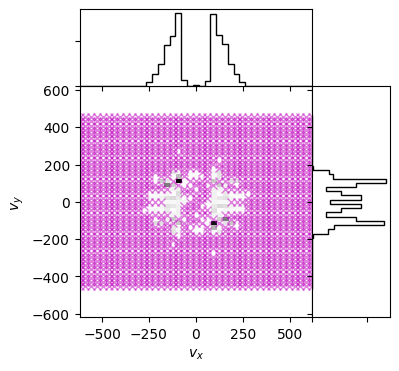

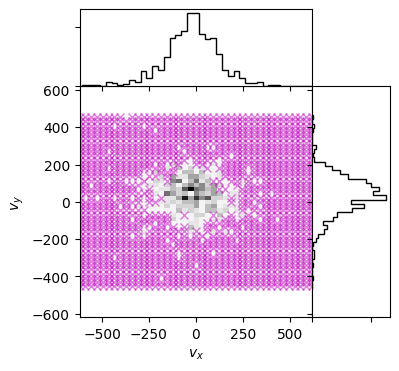

In [13]:
# Orblib pm vs input pm for specific sp_bin_idx
sp_bin_idx_list = [25, 48, 70]

data = np.dot(hist2d_orblib.y.T, orb_weights).T
print(f'{data.shape = }')
print(f'{np.max(hist2d_orblib.y)=}')
for sp_bin_idx in sp_bin_idx_list:
    print(f'{sp_bin_idx = }')
    hist_2d = dyn.kinematics.Histogram2D(xedg=hist2d_orblib.xedg,
                                         y=data[np.newaxis,:,:,:],
                                         normalise=False)
    _ = p.hist2d_plot(hist_2d, orb_idx=0, sp_bin_idx=sp_bin_idx, show_1d=True, empty_bins=True)
    _ = p.hist2d_plot(pm_input.as_histogram2d(), orb_idx=0, sp_bin_idx=sp_bin_idx, show_1d=True, empty_bins=True)

In [14]:
import datetime
datetime.datetime.now()

datetime.datetime(2025, 7, 18, 15, 15, 52, 9108)

In [15]:
f=np.load('Francisco/rot_mod_d5kpc_i00deg/kinematics_hist2d.npz')

In [16]:
f['PSF_weight'], f['PSF_weight'], f['nstarbin']

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [17]:
f['PM_2dhist'][80][15,15], f['PM_2dhist_sigma'][80][15,15], 

(7.0, 2.0)